### Black Friday project

# EDA

In [35]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [36]:
# read dataset
df = pd.read_csv("BlackFriday.csv")

In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [38]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [39]:
df.loc[:, 'Occupation':].describe().T.style

,count,mean,std,min,25%,50%,75%,max
Occupation,537577,8.08271,6.52412,0,2,7,14,20
Marital_Status,537577,0.408797,0.491612,0,0,0,1,1
Product_Category_1,537577,5.29555,3.7507,1,1,5,8,18
Product_Category_2,370591,9.84214,5.08726,2,5,9,15,18
Product_Category_3,164278,12.6698,4.12434,3,9,14,16,18
Purchase,537577,9333.86,4981.02,185,5866,8062,12073,23961


In [40]:
df.info()
# we can see that There are 12 columns with different formats of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [41]:
df.shape

(537577, 12)

In [42]:
# Five string/text columns to consider addressing in some form prior to modeling.
df.get_dtype_counts()

float64    2
int64      5
object     5
dtype: int64

In [43]:
# string columns I intend to use as part of your X
list(df.select_dtypes(include=object))

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [44]:
# to check wich columns have NAN value
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [45]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending=False)

Product_Category_3    373299
Product_Category_2    166986
dtype: int64

In [46]:
# Could be refactored by here's one of many ways to see the missing values by percentage.

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Product_Category_3,373299,69.4
Product_Category_2,166986,31.1
Purchase,0,0.0
Product_Category_1,0,0.0
Marital_Status,0,0.0
Stay_In_Current_City_Years,0,0.0
City_Category,0,0.0
Occupation,0,0.0
Age,0,0.0
Gender,0,0.0


#### We can see that Product_Category_2, and Product_Category_3 have significant NAN values.

In [47]:
# another way to count NAN :)
count_nan = len(df) - df.count()
count_nan

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

 Now I will  check Product_Category_2, and Product_Category_3 colums 
 unique values and then impute a default value for NaNs

In [48]:

print('Product_Category_2 unique values', df['Product_Category_2'].unique())
print('Product_Category_3 unique values', df['Product_Category_3'].unique())

Product_Category_2 unique values [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 unique values [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [49]:
# Another way to do that
for col in df[['Product_Category_2', 'Product_Category_3']]:
    print(col, "Unique Values:", df[col].nunique(), "\n", df[col].unique(),"\n")

Product_Category_2 Unique Values: 17 
 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 

Product_Category_3 Unique Values: 15 
 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.] 



In [50]:
for col in df:
    print(col, df[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Product_Category_2 17
Product_Category_3 15
Purchase 17959


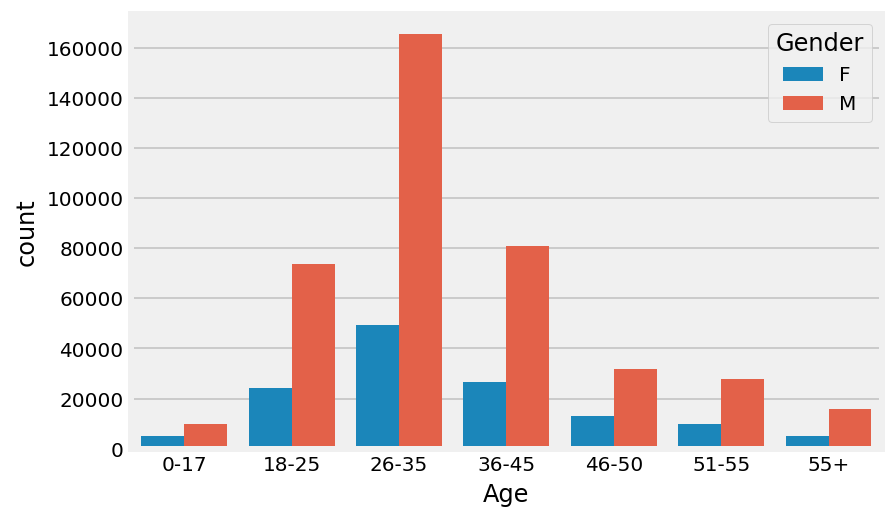

In [51]:
sns.countplot('Age', hue='Gender', 
              order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], data=df);

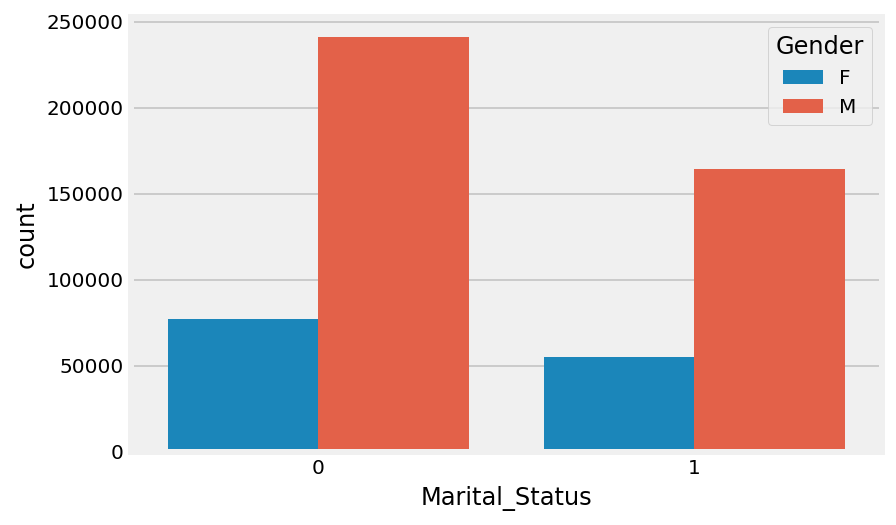

In [52]:
sns.countplot('Marital_Status', hue='Gender', data=df);

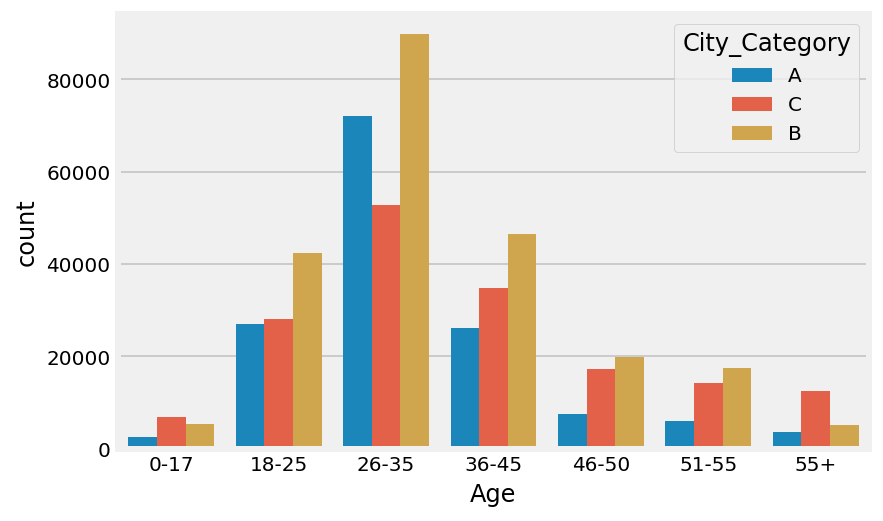

In [53]:
sns.countplot('Age', hue='City_Category', 
               order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], data=df);

In [54]:
# impute 0 for all NAN values 
df.fillna(value=0,inplace=True)

Since our missing data appears in categorical fratures we will impute these to 0 bacuause it will not affect on other category and we wont to remove that records since is huge number of records  
the reason that the data are missing is completely random MCAR unsystematic and introduces no sampling bias==> it safe to use imputation 

In [55]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


In [56]:
df.shape

(537577, 12)

In [57]:
# Check for duplicates in User_ID
idunique = len(set(df.User_ID))
idtotal = df.shape[0]
iddupli = idtotal - idunique
print("There are " + str(iddupli) + " Duplicate User_ID out of " + str(idtotal))

There are 531686 Duplicate User_ID out of 537577


Now let see features Distribution ==> first let see Numeric features


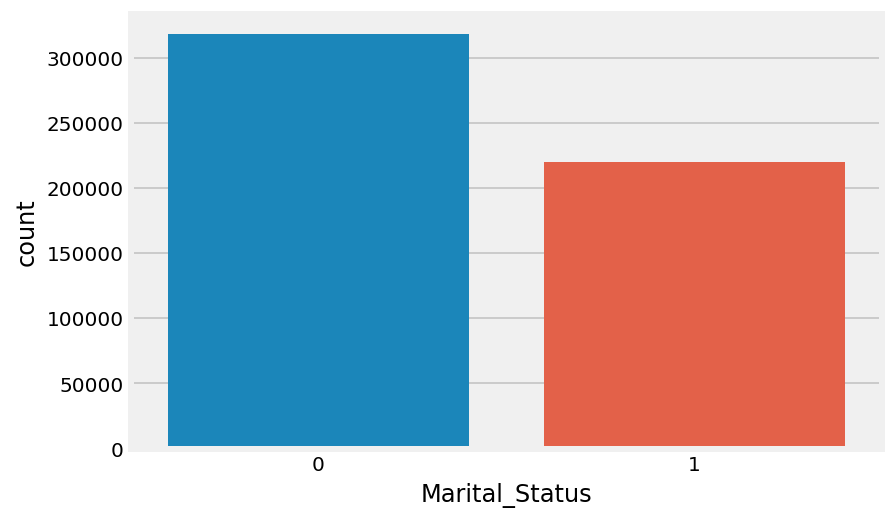

In [58]:
# Marital variable distribution
sns.countplot(df['Marital_Status']);

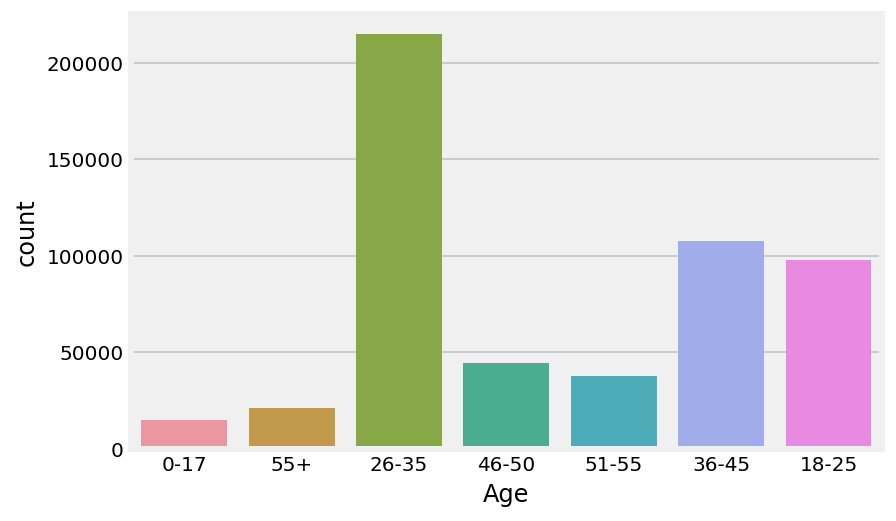

In [59]:
# Age variable distribution
sns.countplot(df['Age']);

In [60]:
# Most of customers in 26-35 years old 
df.Age.value_counts()  

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

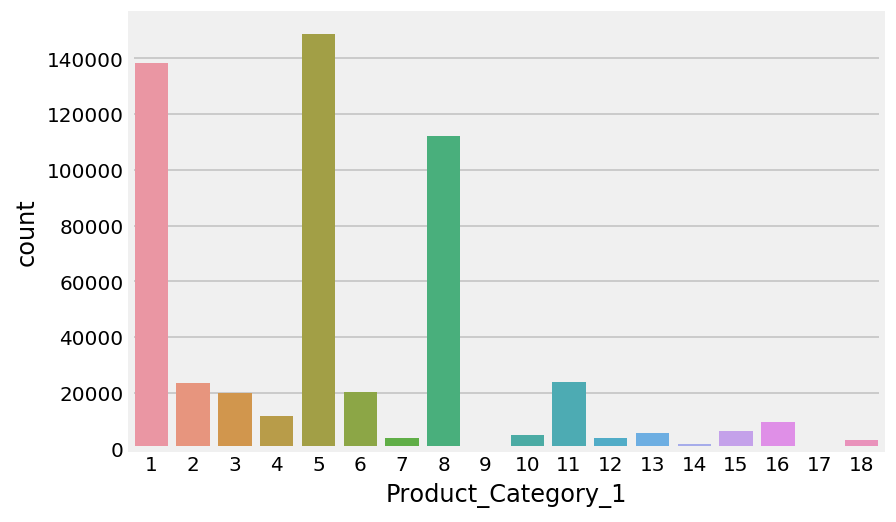

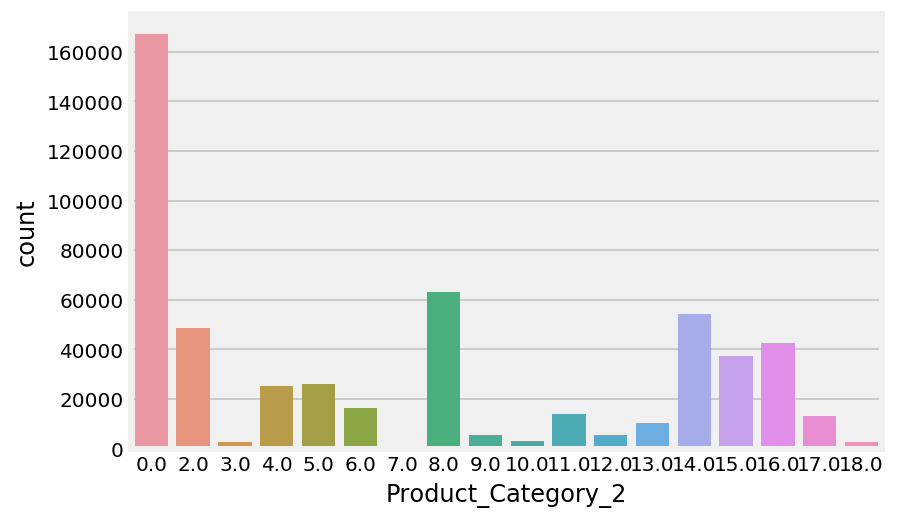

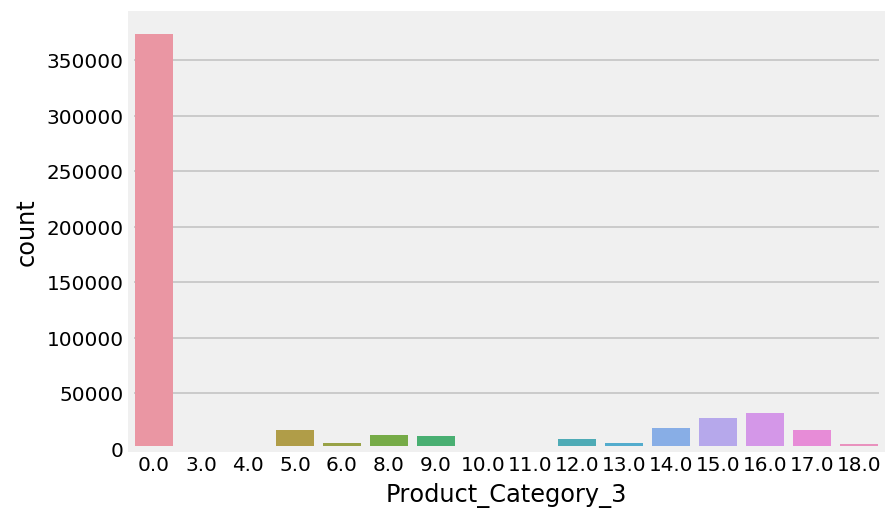

In [61]:
# also loop through the three Product Categories

for i, col in enumerate(df[['Product_Category_1', 'Product_Category_2', 
                              'Product_Category_3']]):
    plt.figure(i)
    sns.countplot(x=col, data=df)

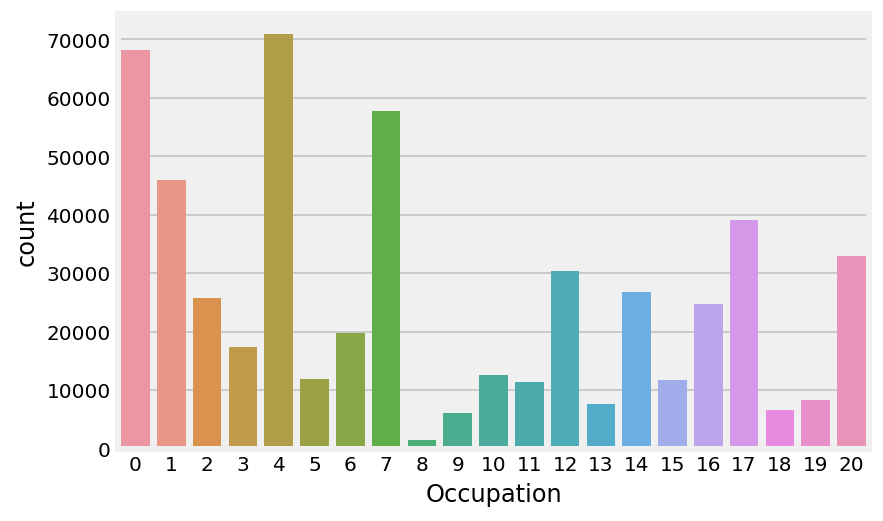

In [62]:
# Occupation variable distribution 
sns.countplot(df['Occupation']);
# majorty of customers are have occupation from 0-7 

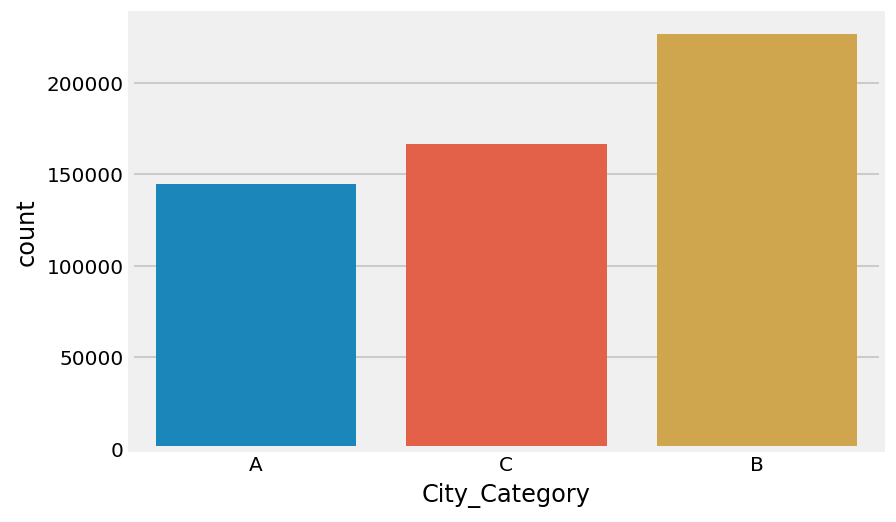

In [63]:
# City_category variable distribution 
sns.countplot(df['City_Category']);
# largest number of customers are live in city B

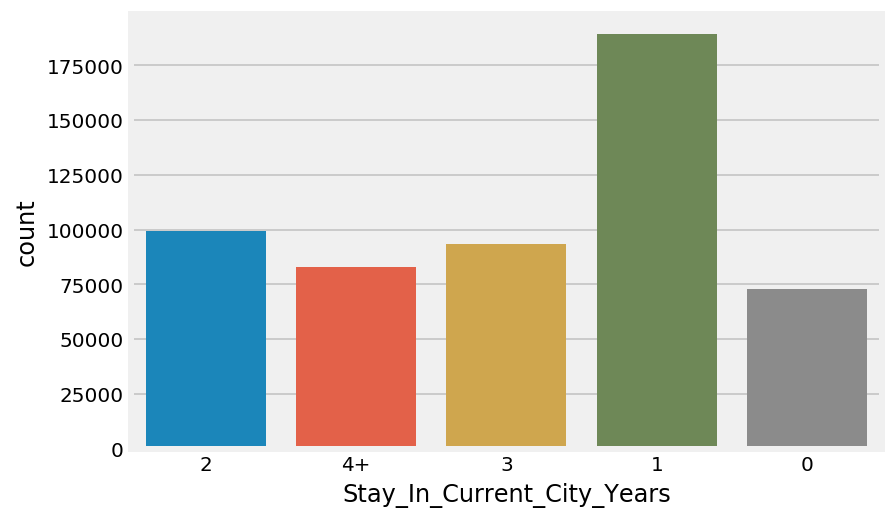

In [64]:
# Stay_In_Current_City_Years variable distribution 
sns.countplot(df['Stay_In_Current_City_Years']);
# people in first year make purchase more than other years.

C:\Users\johar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


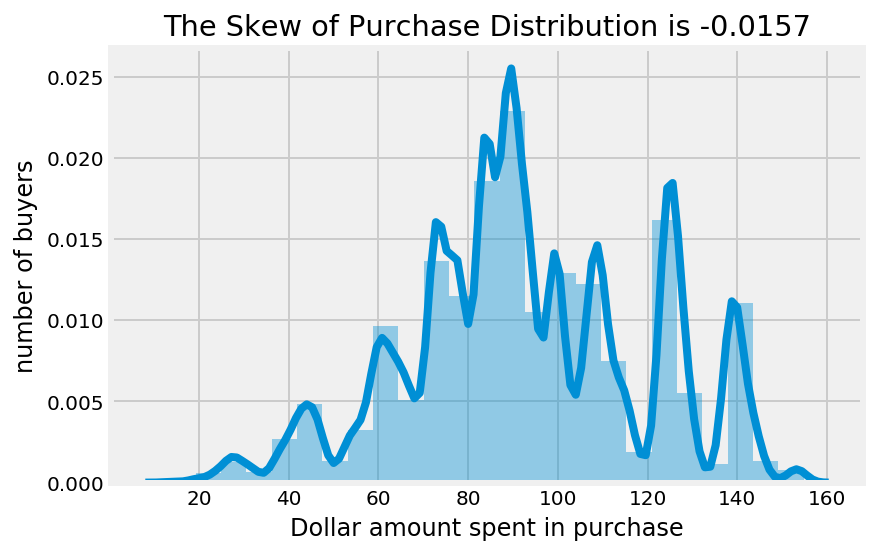

In [65]:
# target variable ==> purchase distribution
newx=np.sqrt(df.Purchase)
sns.distplot(newx, bins = 25)
plt.xlabel("Dollar amount spent in purchase")
plt.ylabel("number of buyers")
plt.title("The Skew of Purchase Distribution is {:.4f}".format(newx.skew()));
df.Purchase = newx

# now using sqrt the Skew is acceptable 

#### Now let see Correlation between numeric features and target variable


In [66]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase              float64
dtype: object

In [67]:
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10])
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Product_Category_3    0.272319
Product_Category_2    0.026305
Occupation            0.019991
User_ID               0.004252
Marital_Status        0.000219
Product_Category_1   -0.336612
Name: Purchase, dtype: float64
Purchase              1.000000
Product_Category_3    0.272319
Product_Category_2    0.026305
Occupation            0.019991
User_ID               0.004252
Marital_Status        0.000219
Product_Category_1   -0.336612
Name: Purchase, dtype: float64


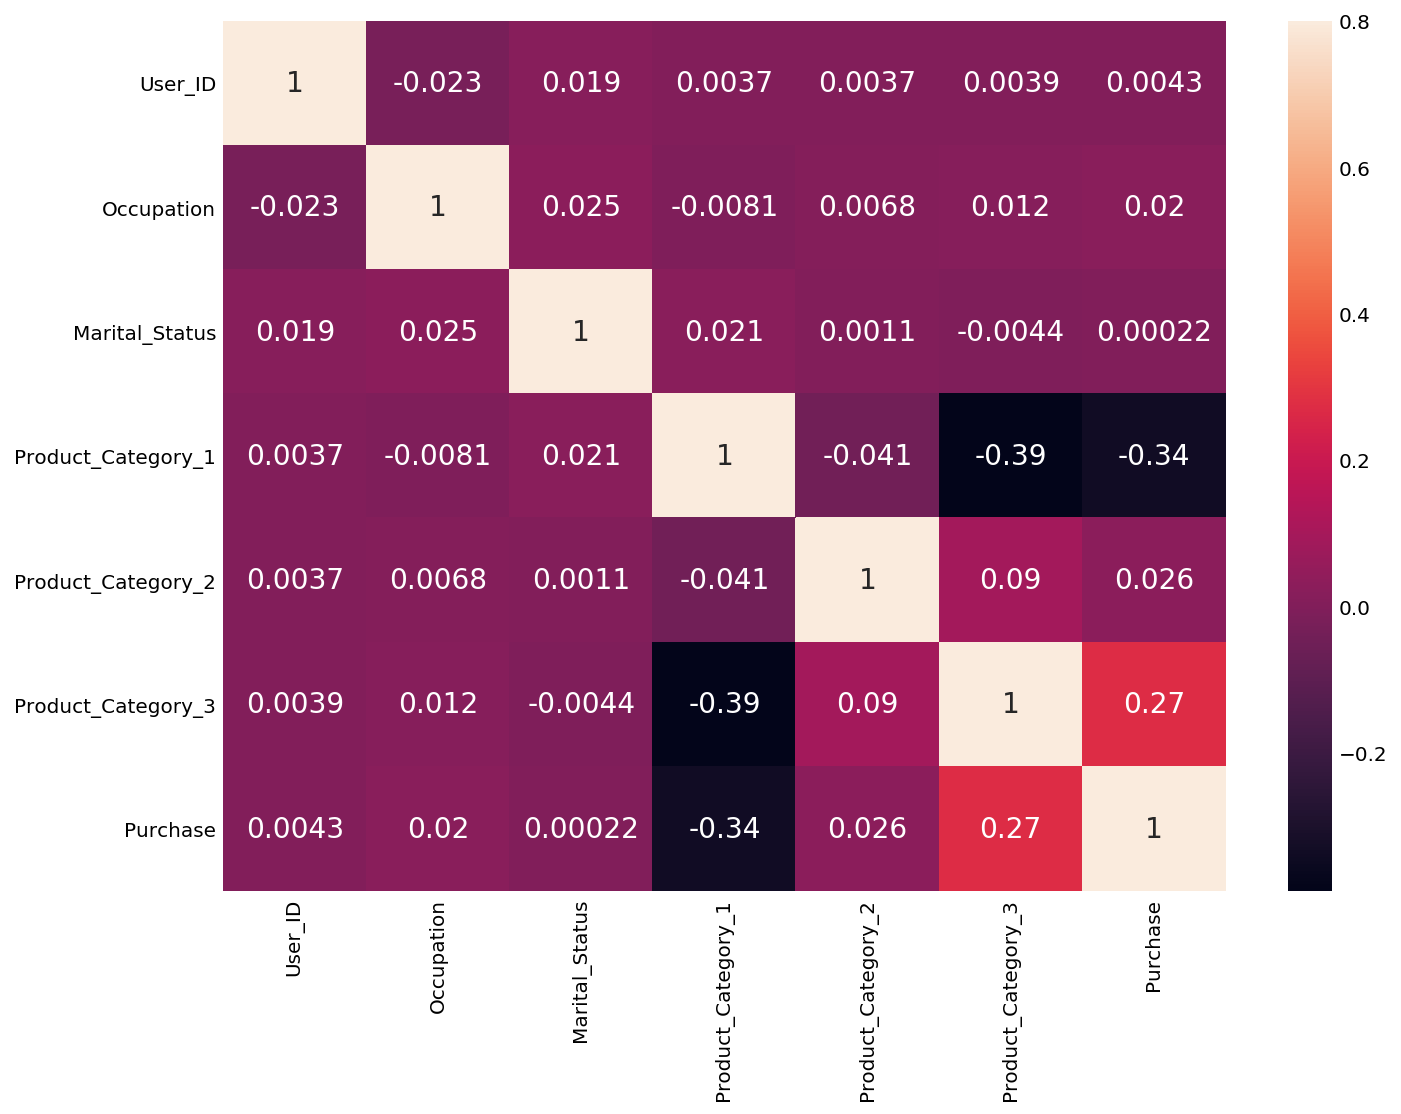

In [84]:
# create correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 14}, annot=True);

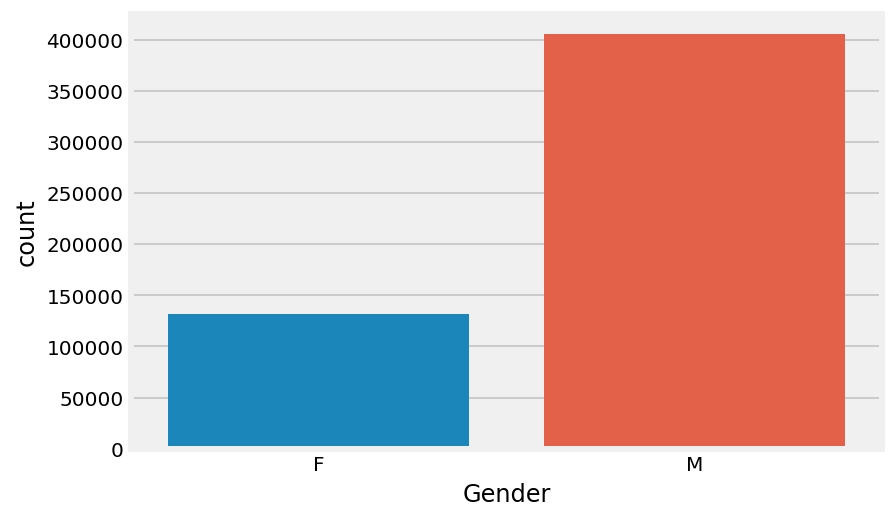

In [35]:
# Now let see Categorical features distribution 
# Gender variable distribution
sns.countplot(df['Gender']);

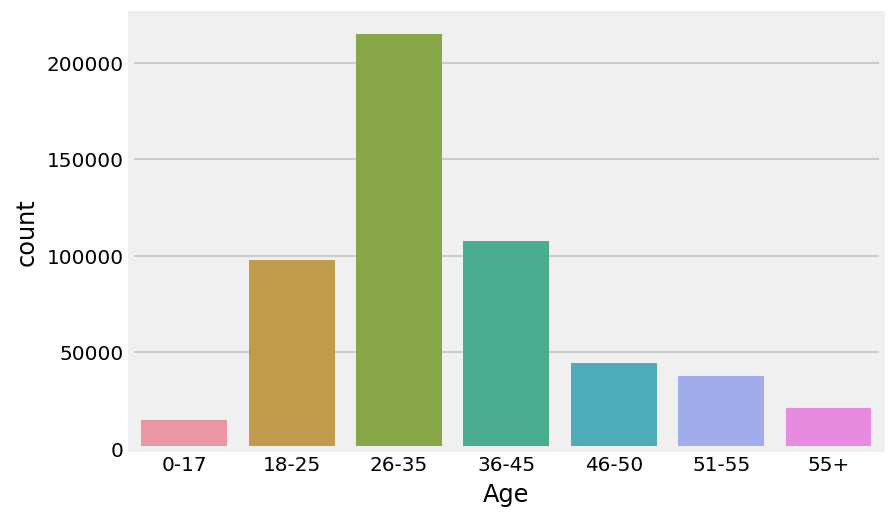

In [36]:
# Age variable distribution

# One can order by the index or values as well
sns.countplot(x=df['Age'], order=['0-17','18-25','26-35','36-45','46-50','51-55','55+']);

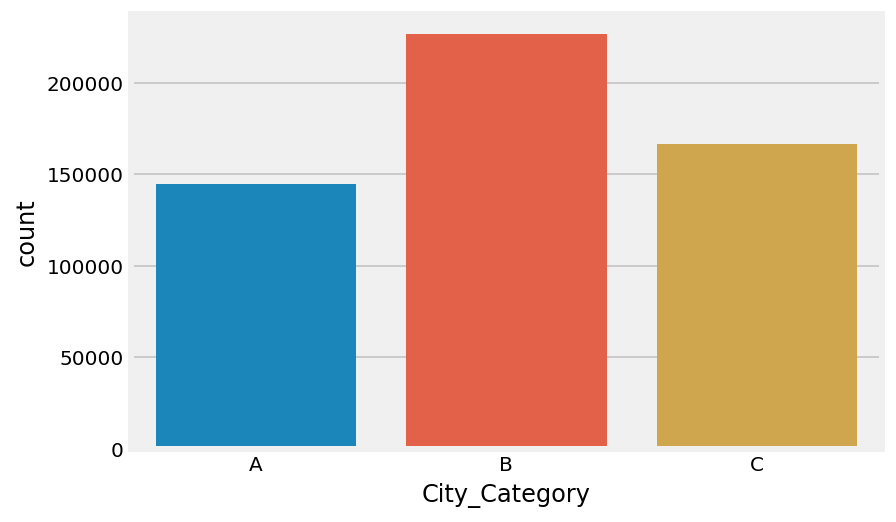

In [37]:
# city_category variable distribution
sns.countplot(df['City_Category'], order=['A', 'B', 'C']);

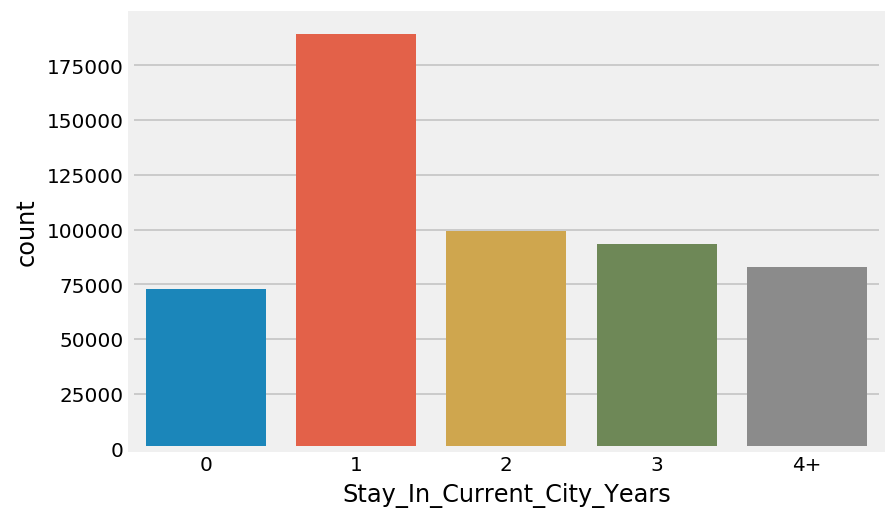

In [38]:
# stay_in_current city_years variable distribution
sns.countplot(df['Stay_In_Current_City_Years'], order=['0', '1', '2', '3', '4+']);

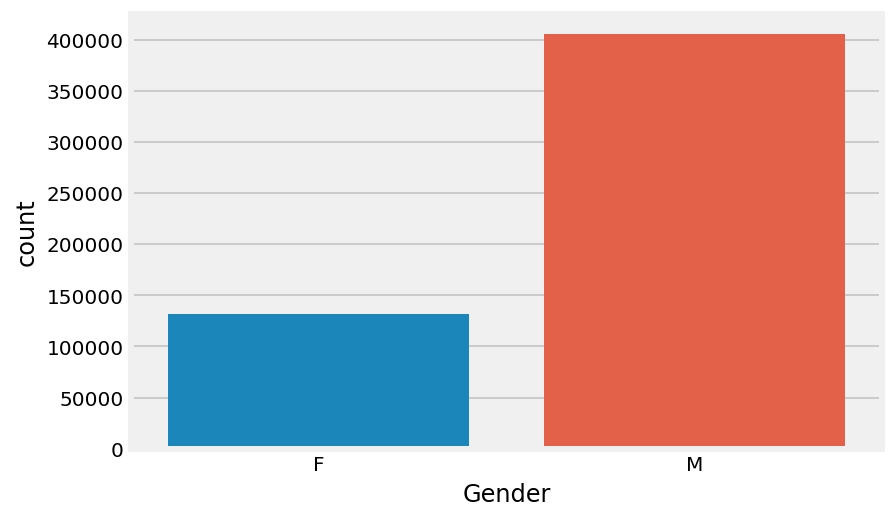

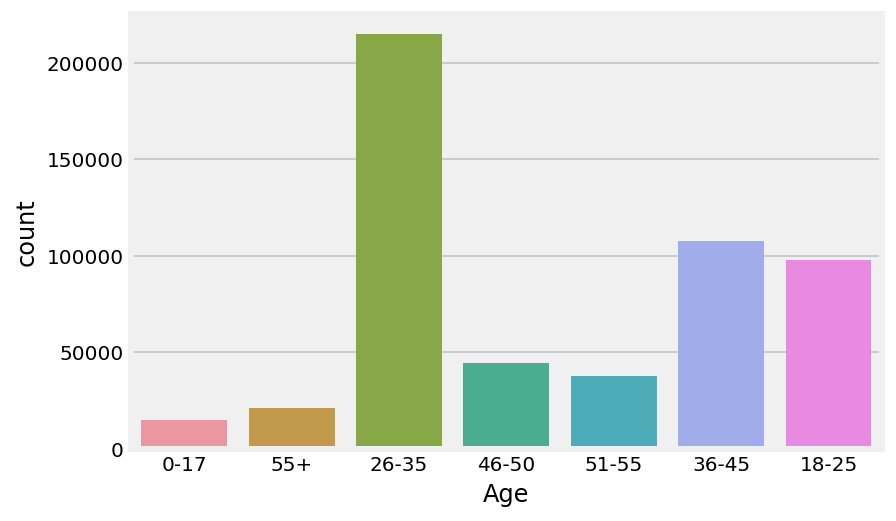

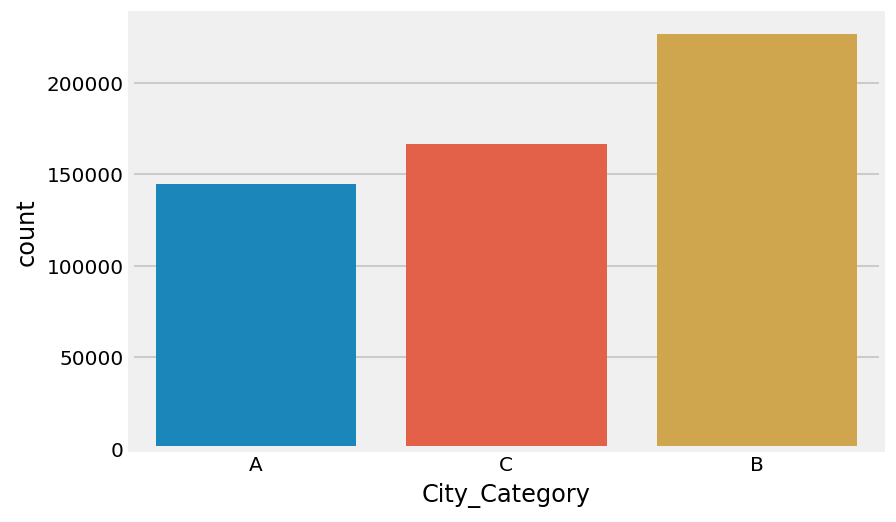

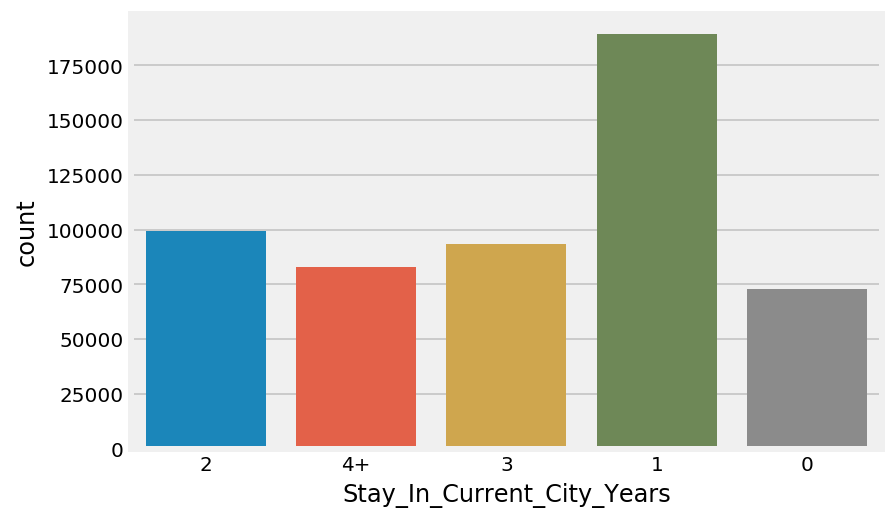

In [39]:
for i, col in enumerate(df[['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']]):
    plt.figure(i)
    sns.countplot(x=col, data=df)

Two features relationship analysis (Features with target ==> Purchase


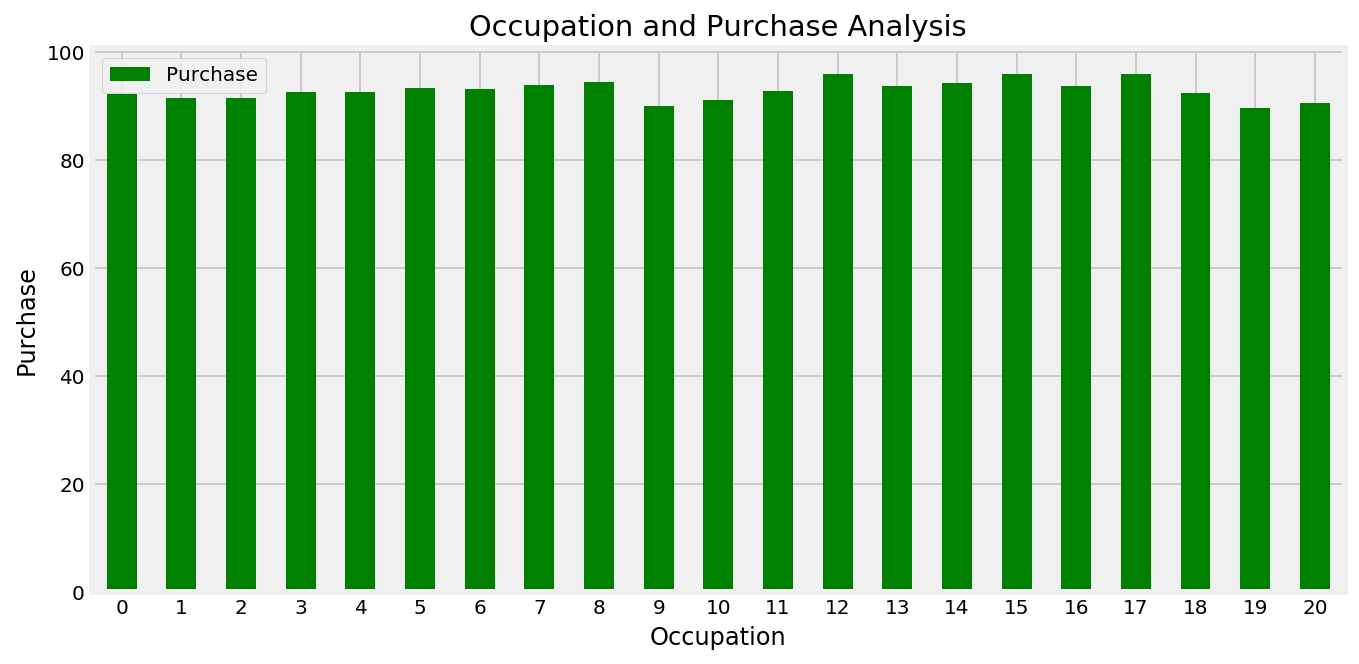

In [40]:
#Occupation with purchase analysis since it has high corr value  2.1%
occupation_v = df.pivot_table(index="Occupation", values="Purchase", aggfunc=np.mean)
occupation_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average customer with occupation 12 and 17 are the ones who spent the most

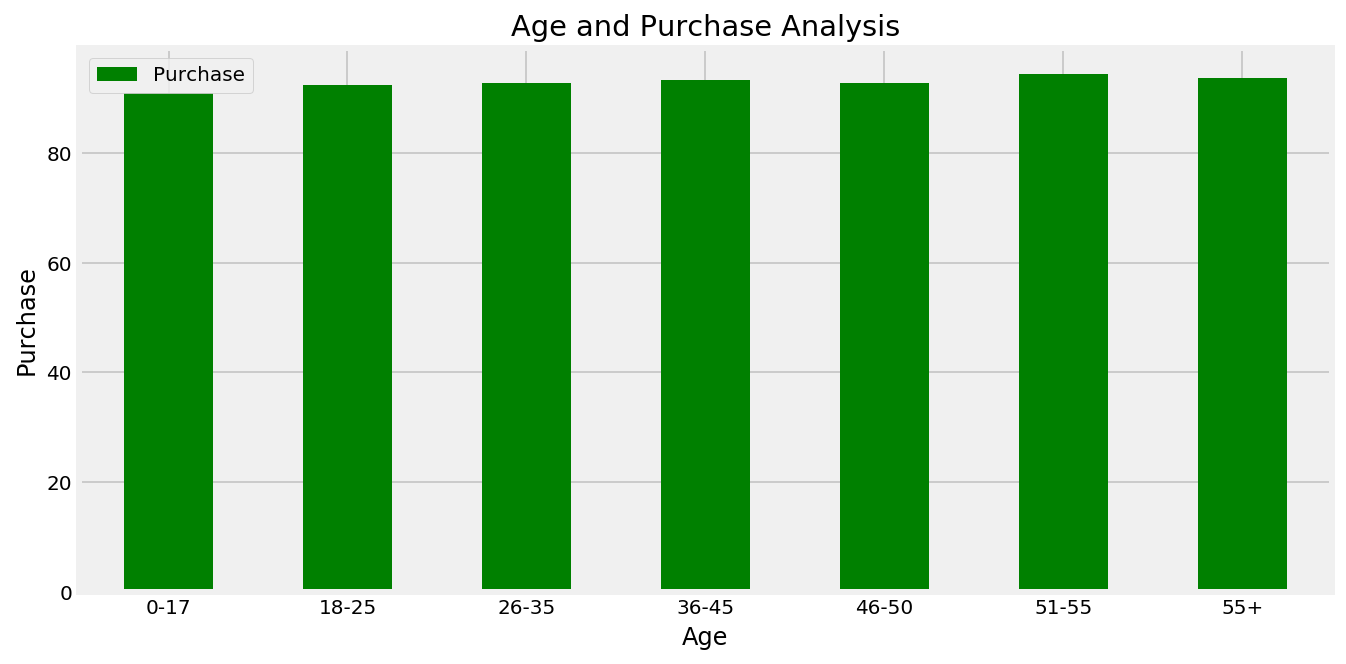

In [41]:
# Age with purchase analysis
Age_v= df.pivot_table(index="Age", values="Purchase", aggfunc=np.mean)
Age_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average customer with 51-55 years old are the ones who spent the most

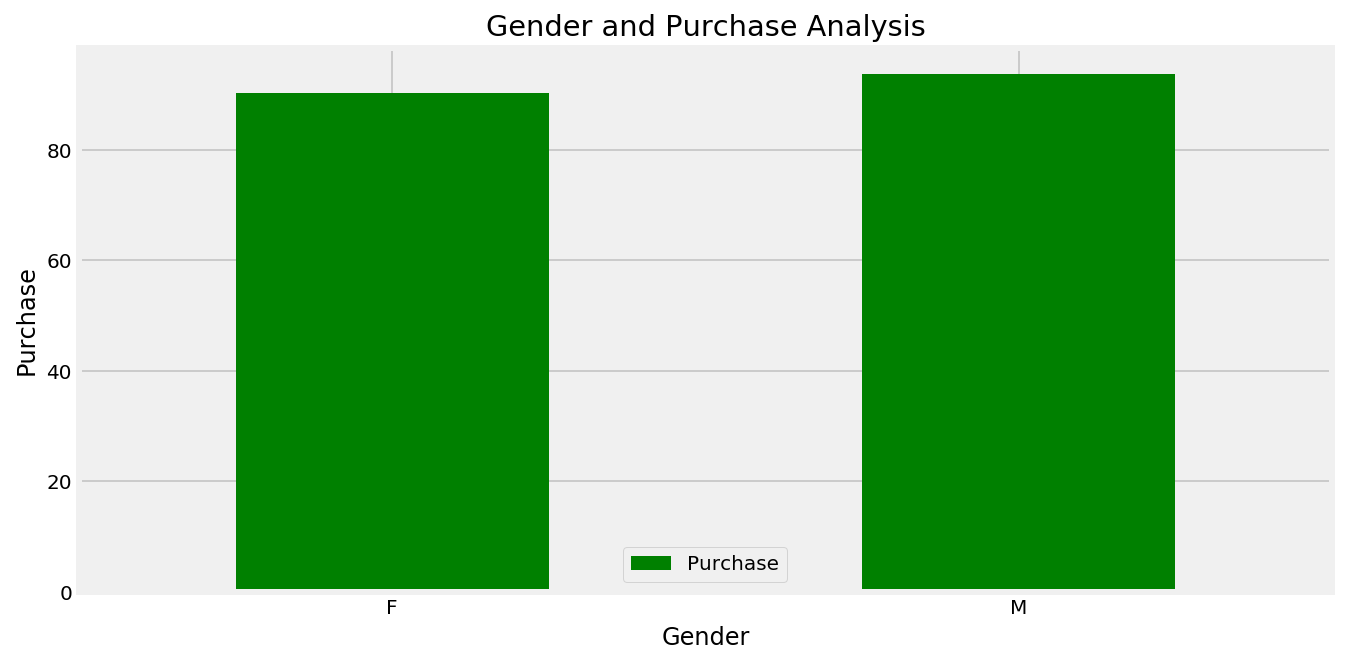

In [42]:
# Gender with Purchase analysis
Gen_v= df.pivot_table(index="Gender", values="Purchase", aggfunc=np.mean)
Gen_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average males spent more than females 

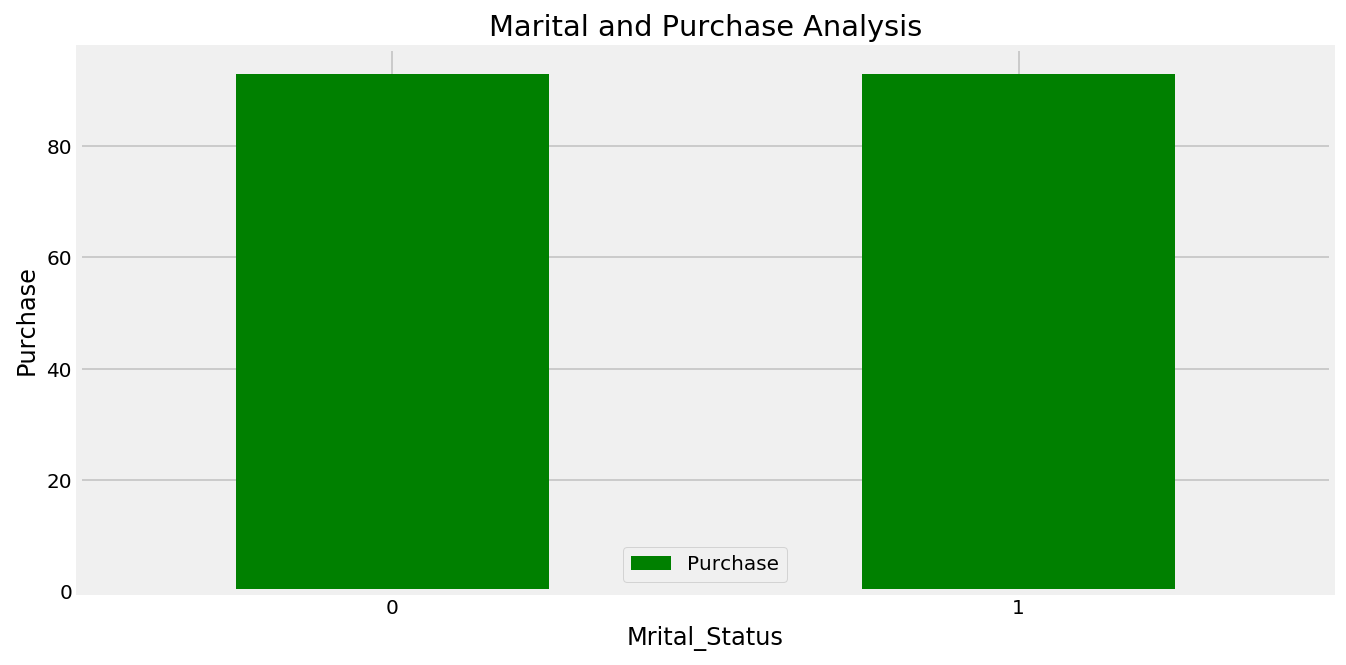

In [43]:
# Marital_status with Purchase analysis
m_v= df.pivot_table(index="Marital_Status", values="Purchase", aggfunc=np.mean)
m_v.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Mrital_Status")
plt.ylabel("Purchase")
plt.title("Marital and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average Single and Mrried spent the same 

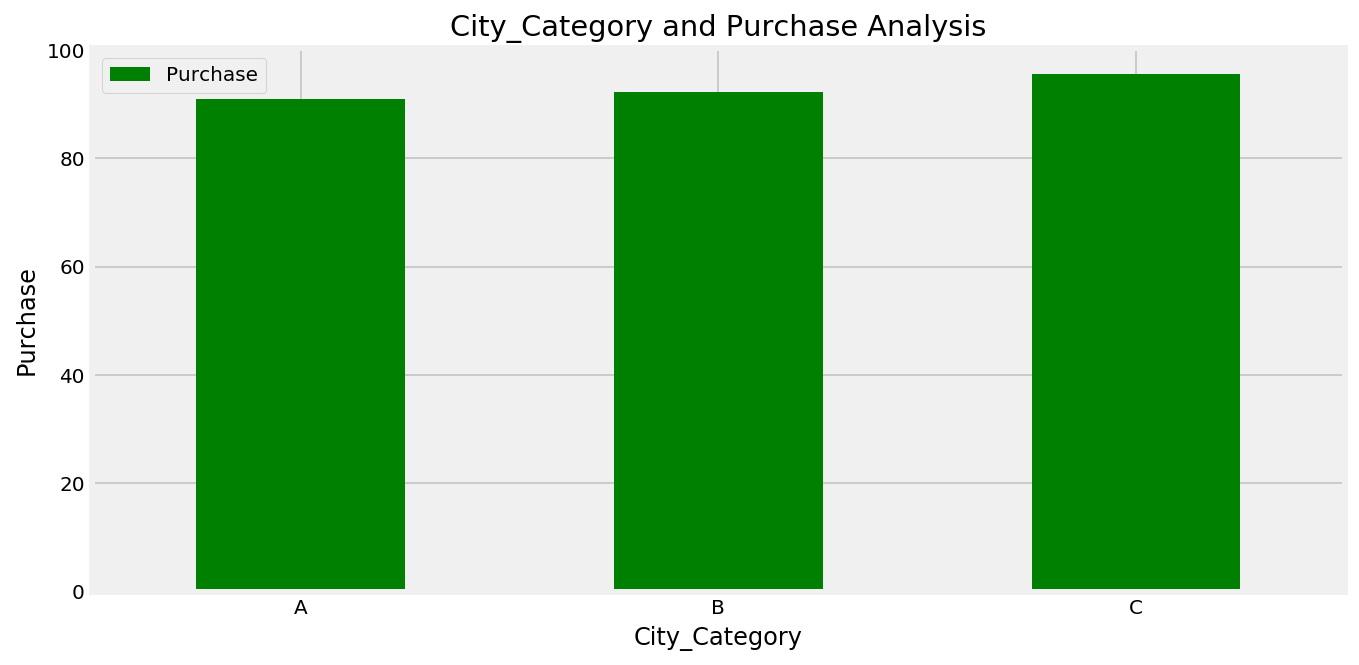

In [44]:
#city_category with Purchase analysis
city_c= df.pivot_table(index="City_Category", values="Purchase", aggfunc=np.mean)
city_c.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title("City_Category and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average customers who lived in city C spent the most 

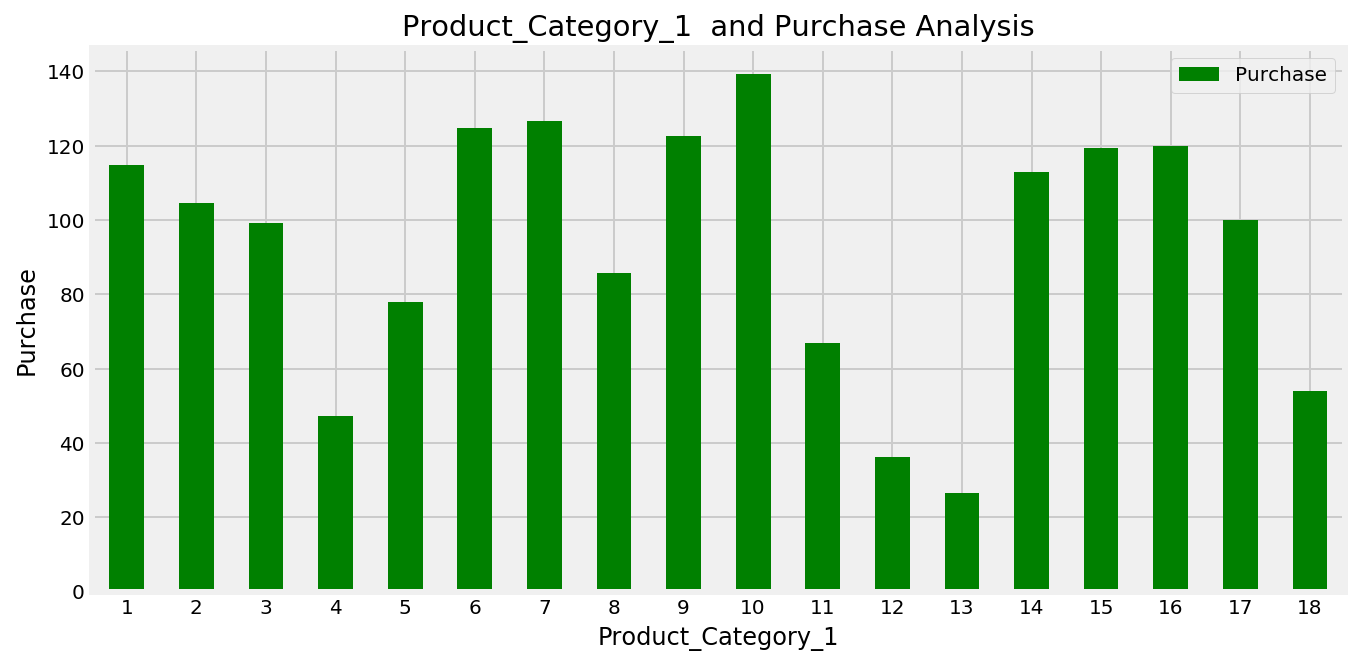

In [45]:
#product_category_1 with Purchase analysis
Pc_c= df.pivot_table(index="Product_Category_1", values="Purchase", aggfunc=np.mean)
Pc_c.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1  and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average in product_Caterory_1 type 10 is most purchased  

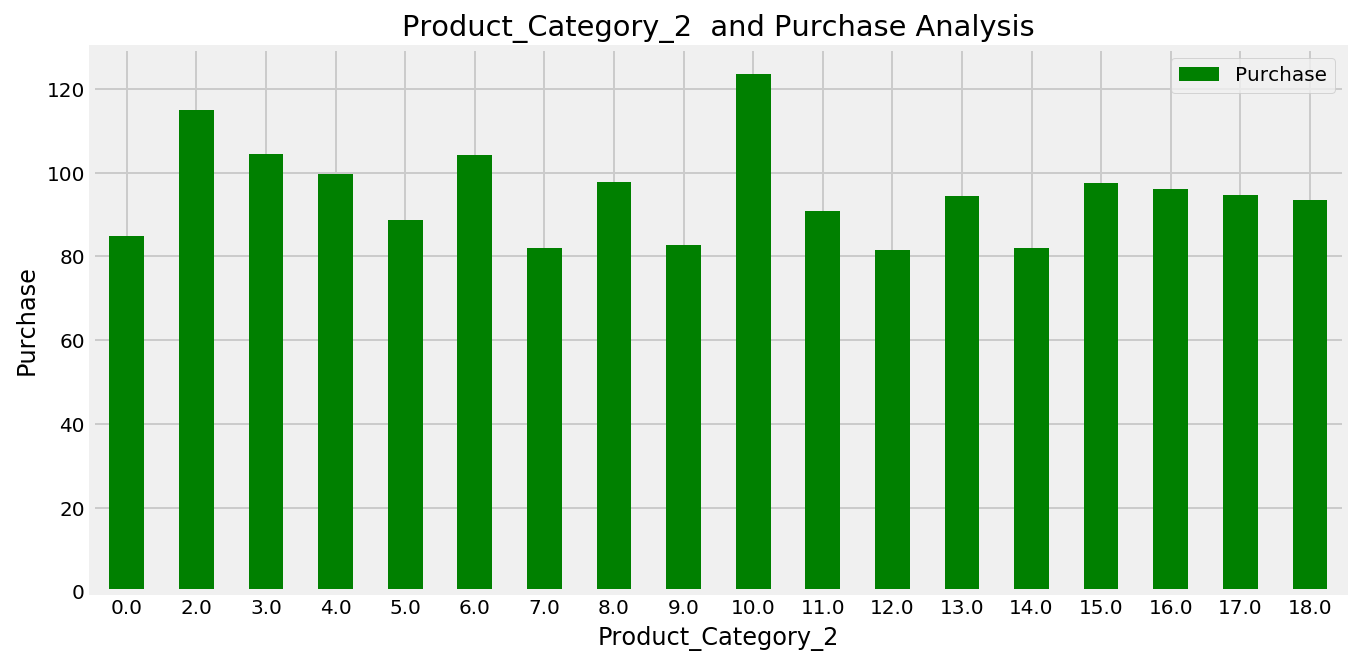

In [46]:
#product_category_2 with Purchase analysis
Pc_2= df.pivot_table(index="Product_Category_2", values="Purchase", aggfunc=np.mean)
Pc_2.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2  and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average in product_Caterory_2 type 10 is most purchased  

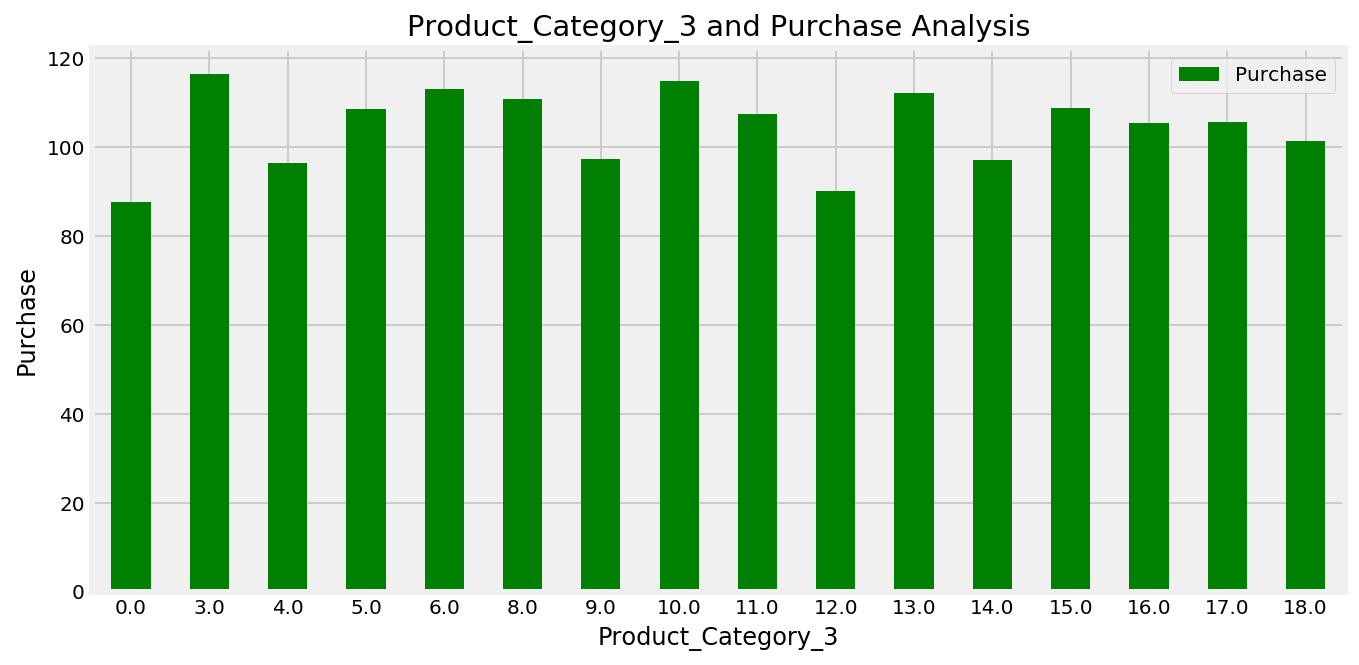

In [47]:
#product_category_3 with Purchase analysis
Pc_3= df.pivot_table(index="Product_Category_3", values="Purchase", aggfunc=np.mean)
Pc_3.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Product_Category_3")
plt.ylabel("Purchase")
plt.title("Product_Category_3 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average in product_Caterory_3 type 3 is most purchased  

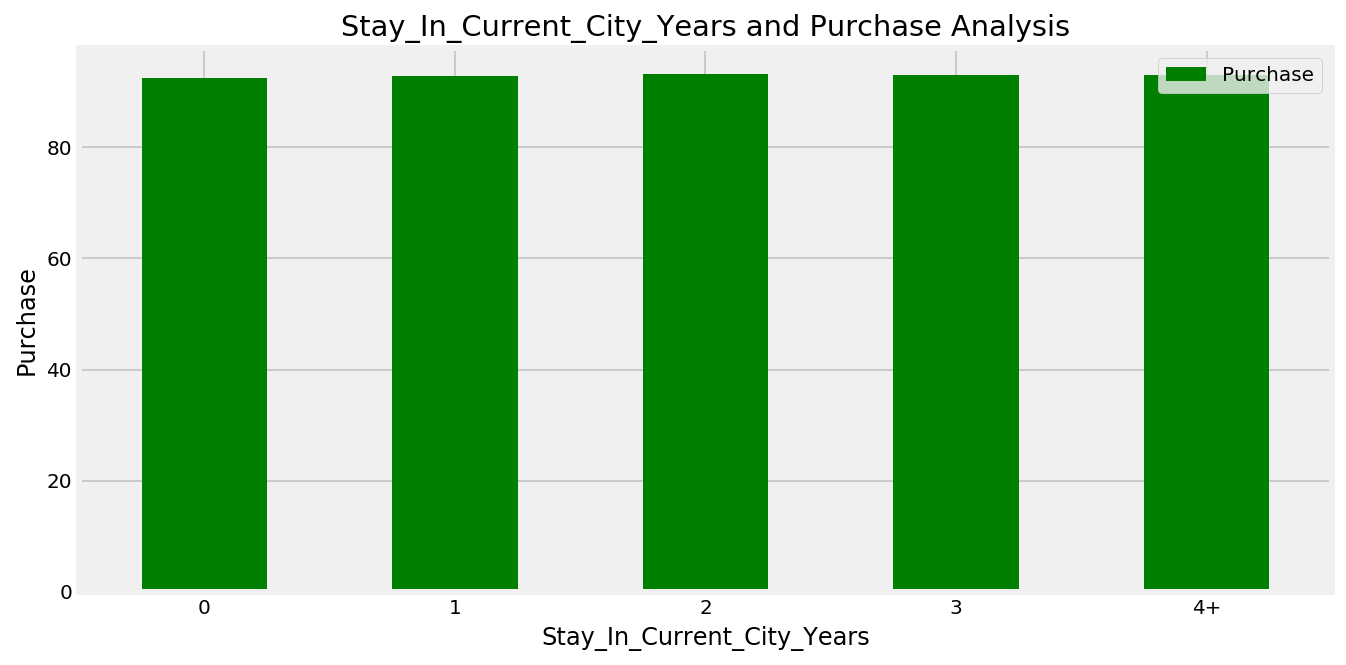

In [48]:
#stayin_current_city with Purchase analysis
Pc_3= df.pivot_table(index="Stay_In_Current_City_Years", values="Purchase", aggfunc=np.mean)
Pc_3.plot(kind='bar', color='green',figsize=(10,5))
plt.xlabel("Stay_In_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()
# on average in Stay_In_Current_City_Years spent are the same in all groups

EDA findings:

-Around half a million rows in this dataset
 -Almost all columns represent categorical features
- Product Category 2 & 3 had a lot of missing values, now represented as category 0
-we have to represent the Stay_In_Current_City_Years category numerically 


Features Engineering: 

In [49]:

df.drop(['Product_ID'], axis=1, inplace=True)

In [50]:
#transform categorical features to continous features
cleanup_nums = {"Gender":     {"F": 0, "M": 1}}

df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)


In [51]:
df = pd.get_dummies(df, columns=['Age'], drop_first=True)


In [52]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'], drop_first=True)

In [53]:
df.replace(cleanup_nums, inplace=True)
df.head()


,User_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,0,10,0,3,0.0,0.0,91.487704,0,0,0,0,0,0,0,0,0,1,0,0
1,1000001,0,10,0,1,6.0,14.0,123.288280,0,0,0,0,0,0,0,0,0,1,0,0
2,1000001,0,10,0,12,0.0,0.0,37.709415,0,0,0,0,0,0,0,0,0,1,0,0
3,1000001,0,10,0,12,14.0,0.0,32.511536,0,0,0,0,0,0,0,0,0,1,0,0
4,1000002,1,16,0,8,0.0,0.0,89.269256,0,1,0,0,0,0,0,1,0,0,0,1


In [54]:
y = df["Purchase"]
X = df.drop(["Purchase"], axis=1)

In [55]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(403182, 19) (134395, 19) (403182,) (134395,)


Modeling:

In [56]:
#linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
fitl = lr.fit(X_train,y_train) # fit training data
print("Accuracy R^2 of Linear regression on train set: {:.2f}".format(fitl.score(X_train,y_train)*100))
print("Accuracy R^2 of Linear regression on test set: {:.2f}".format(fitl.score(X_test,y_test)*100))

Accuracy R^2 of Linear regression on train set: 14.36
Accuracy R^2 of Linear regression on test set: 14.04


In [57]:
lr_Predict = lr.predict(X_test)

In [58]:
# print the coefficients
print(lr.intercept_)
print(lr.coef_)

45.596753267017235
[ 4.83289313e-05  2.27481561e+00  2.70918689e-02 -3.62726028e-01
 -1.92946772e+00 -5.14233408e-03  6.85863525e-01  7.63402220e-01
  3.47445706e+00  2.00428714e+00  3.01866532e+00  3.44636507e+00
  3.50812864e+00  5.15045519e+00  4.25197734e+00  1.49654619e-01
  3.20111679e-01  1.18900518e-01  2.74535232e-01]


In [59]:
#Import metrics Library
from sklearn import metrics
#MAE
print( metrics.mean_absolute_error(y_test,lr_Predict))
#MSE
print( metrics.mean_squared_error(y_test,lr_Predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,lr_Predict)))

18.753131750629116
600.8064872835863
24.511354252337554


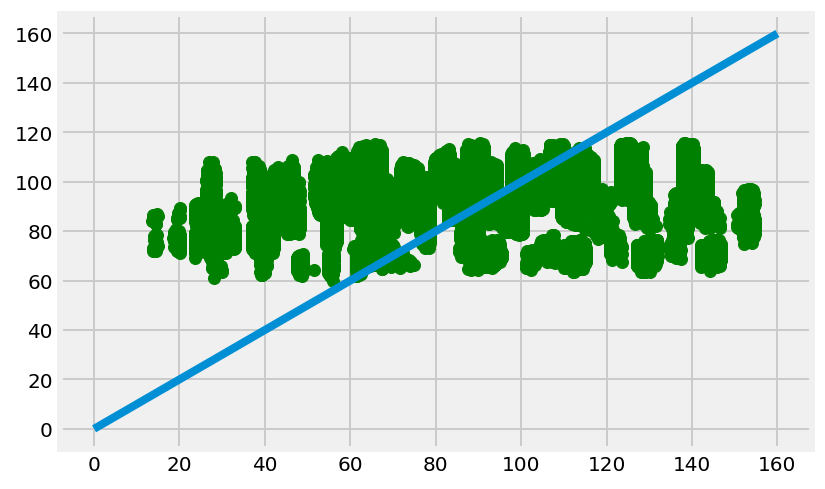

In [60]:
#plot output
plt.scatter(y_test,lr_Predict, color='green')
plt.plot([0,160],[0,160])

compare RMSE with null RMSE
It is a benchmark against which what I want to measure your regression model.
Split X and y into training and testing sets.

In [61]:
X_sample, X_non, y_sample, y_non = train_test_split(X, y, random_state=123, train_size=0.4)
X_train, X_test ,y_train, y_test = train_test_split(X_sample, y_sample, random_state=123)
# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
y_null

C:\Users\johar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([93.01452386, 93.01452386, 93.01452386, ..., 93.01452386,
       93.01452386, 93.01452386])

In [62]:
# Compute null RMSE.
np.sqrt(metrics.mean_squared_error(y_test, y_null))

26.20245549757459

In [63]:
#Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
rf= RandomForestRegressor(random_state=42)
fitr = rf.fit(X_train,y_train) # fit training data
print("R^2 of  RandomForestRegressor on train set: {:.2f}".format(fitr.score(X_train,y_train)*100))
print("R^2 of RandomForestRegressor on test set: {:.2f}".format(fitr.score(X_test,y_test)*100))


C:\Users\johar\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


R^2 of  RandomForestRegressor on train set: 86.00
R^2 of RandomForestRegressor on test set: 61.84


In [64]:
rf_Predict = rf.predict(X_test)

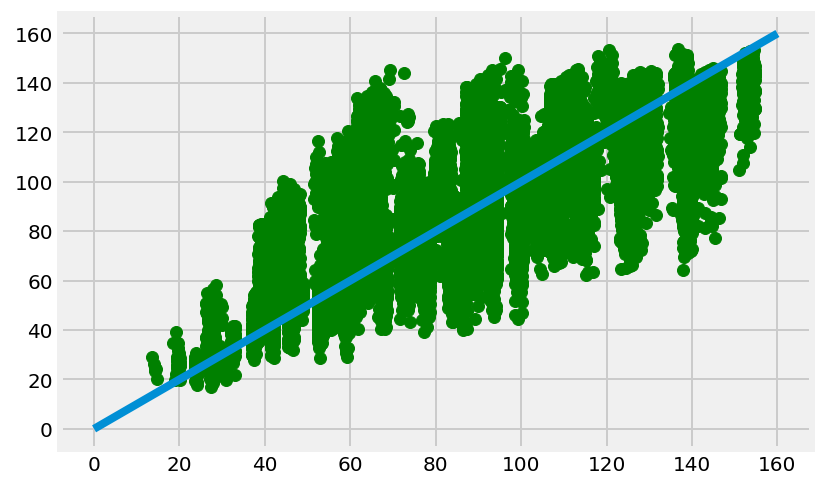

In [65]:
#plot output
plt.scatter(y_test,rf_Predict, color='green')
plt.plot([0,160],[0,160])

In [66]:
#MAE
print( metrics.mean_absolute_error(y_test,rf_Predict))
#MSE
print( metrics.mean_squared_error(y_test,rf_Predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,rf_Predict)))

12.176869773796268
261.97120185154466
16.185524454015837


In [67]:
param_grid = {"max_depth": [2,3,4,5,6,7,8]
              ,"min_samples_split" :[2,3,4,5,6]
              ,"n_estimators" : [10,15,20]
              ,"min_samples_leaf": [1,2,3,4,5]
              ,"criterion": ["mse"]}

In [68]:
rfr = RandomForestRegressor(random_state=42)
CV_rfr = RandomizedSearchCV(rfr, param_grid,cv= 5, verbose=2)
CV_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse, total=   5.9s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s


[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse, total=   6.0s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse, total=   5.6s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse, total=   5.8s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=5, max_depth=4, criterion=mse, total=   5.6s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=4, max_depth=8, criterion=mse 
[CV]  n_estimators=20, min_samples_split=3, min_samples_leaf=4, max_depth=8, criterion=mse, total=  10.6s
[CV] n_estimators=20, min_samples_split=3, min_samples_leaf=4, max_depth=8, criterion=mse 
[CV]  n_estimat

[CV]  n_estimators=15, min_samples_split=6, min_samples_leaf=1, max_depth=6, criterion=mse, total=   5.2s
[CV] n_estimators=15, min_samples_split=6, min_samples_leaf=1, max_depth=6, criterion=mse 
[CV]  n_estimators=15, min_samples_split=6, min_samples_leaf=1, max_depth=6, criterion=mse, total=   5.3s
[CV] n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse 
[CV]  n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse, total=   6.9s
[CV] n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse 
[CV]  n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse, total=   6.8s
[CV] n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse 
[CV]  n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse, total=   6.8s
[CV] n_estimators=15, min_samples_split=2, min_samples_leaf=5, max_depth=8, criterion=mse 
[CV]  n_estimat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 3, 4, 5, 6], 'n_estimators': [10, 15, 20], 'min_samples_leaf': [1, 2, 3, 4, 5], 'criterion': ['mse']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [69]:
# show me best parameter
CV_rfr.best_params_

{'n_estimators': 20,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_depth': 8,
 'criterion': 'mse'}

In [70]:
# Automaticaly create model with best parameter 
rf_best = CV_rfr.best_estimator_

In [71]:
#fit 
rf_best.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
rf_Predict = rf_best.predict(X_test)

In [73]:
#MAE
print( metrics.mean_absolute_error(y_test,rf_Predict))
#MSE
print( metrics.mean_squared_error(y_test,rf_Predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,rf_Predict)))

12.044974064231695
242.39391429256534
15.569004923005366


In [74]:
CV_rfr.cv_results_

C:\Users\johar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\johar\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([ 5.81346245, 10.24014578,  6.94046526,  4.560534  ,  3.02544451,
         3.81514549,  4.92507095,  4.11335893,  5.2836822 ,  6.84909182]),
 'std_fit_time': array([0.14331572, 0.65619165, 0.07381296, 0.01606389, 0.1137449 ,
        0.15433679, 0.27040805, 0.12372333, 0.0202513 , 0.04349379]),
 'mean_score_time': array([0.06612258, 0.10612526, 0.07079849, 0.05963016, 0.03922434,
        0.05367827, 0.05241838, 0.04629683, 0.05919075, 0.07716093]),
 'std_score_time': array([0.01669382, 0.00719012, 0.00481405, 0.00226815, 0.00825081,
        0.00970487, 0.01533103, 0.00673752, 0.00225582, 0.00493082]),
 'param_n_estimators': masked_array(data=[20, 20, 20, 10, 10, 20, 15, 10, 15, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[3, 3, 2, 5, 5, 5, 4, 2, 6, 2],
              mask=[False, False, False, Fal

In [75]:
CV_rfr.best_index_

1

In [76]:
scoreslst = []
paramslst = []
for params, score in sorted(zip(CV_rfr.cv_results_['params'], CV_rfr.cv_results_['mean_test_score']), key=lambda x:x[1]):
    print("Score ", score, "for params", params)
    print("*"*100)
    scoreslst.append(score)
    paramslst.append(params)

Score  0.4387981149791142 for params {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'mse'}
****************************************************************************************************
Score  0.48086725973047634 for params {'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 4, 'criterion': 'mse'}
****************************************************************************************************
Score  0.5873857305507489 for params {'n_estimators': 15, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 5, 'criterion': 'mse'}
****************************************************************************************************
Score  0.5891206538318523 for params {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'mse'}
****************************************************************************************************
Score  0.6141595285148282 for p

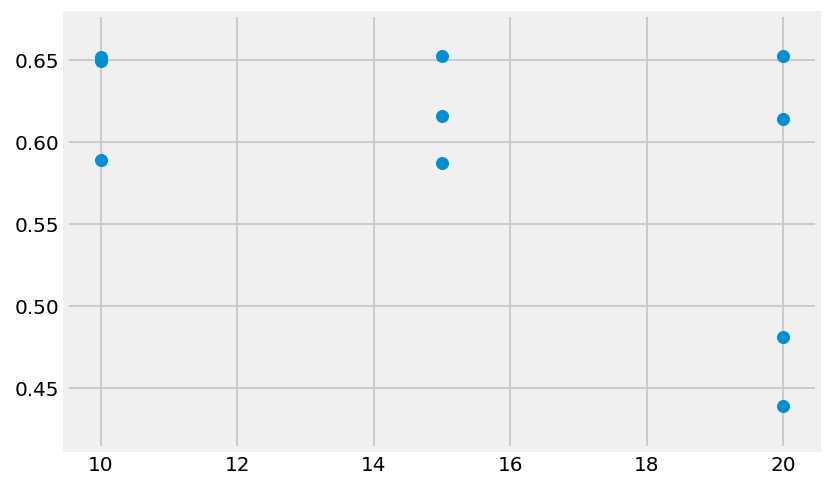

In [77]:
# Example for the number of estimator compared to score values
plt.scatter([n['n_estimators'] for n in paramslst], scoreslst)